In [2]:
""" IMP LEARNs 
>># Median is usually chosen for numerical features, Mode is for Categorical, THINK !


FacetGrid combined with .map gives the most convincing visuals to me.
vary these parameters - col='Survived', row='Embarked',hue='Sex',
And then Map to a plt.hist or sns.pointplot, giving the x axis parameter in it.

eg : 
grid = sns.FacetGrid(train_df, col='Survived', row='Sex',hue='Embarked', size=3.0, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.85, bins=20)
OR
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

numpy.where(condition[, x, y])

If both x and y are specified, the output array contains elements of x where condition is True,
and elements from y elsewhere.

"""

" IMP LEARNs \n>># Median is usually chosen for numerical features, Mode is for Categorical, THINK !\n\n\nFacetGrid combined with .map gives the most convincing visuals to me.\nvary these parameters - col='Survived', row='Embarked',hue='Sex',\nAnd then Map to a plt.hist or sns.pointplot, giving the x axis parameter in it.\n\neg : \ngrid = sns.FacetGrid(train_df, col='Survived', row='Sex',hue='Embarked', size=3.0, aspect=1.6)\ngrid.map(plt.hist, 'Age', alpha=.85, bins=20)\nOR\ngrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')\ngrid.add_legend();\n\nnumpy.where(condition[, x, y])\n\nIf both x and y are specified, the output array contains elements of x where condition is True,\nand elements from y elsewhere.\n\n"

In [3]:
"""Cool functions - 

train_df.Age.value_counts() # Like describe, but with just the counts

dataset.Name.str.extract 
for dataset in combine: #two datasets.
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)


pd.cut - 
train_df['AgeBand'] = pd.cut(train_df['Age'], 5) # Cuts the data into 5 groups


"""

'Cool functions - \n\ntrain_df.Age.value_counts() # Like describe, but with just the counts\n\ndataset.Name.str.extract \nfor dataset in combine: #two datasets.\n    dataset[\'Title\'] = dataset.Name.str.extract(\' ([A-Za-z]+)\\.\', expand=False)\n\ntitle_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}\n    dataset[\'Title\'] = dataset[\'Title\'].map(title_mapping)\n\n\npd.cut - \ntrain_df[\'AgeBand\'] = pd.cut(train_df[\'Age\'], 5) # Cuts the data into 5 groups\n\n\n'

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
figsize=(20,10)

In [6]:
# train_df = train_df[train_df['Survived']==1]

In [7]:
print(train_df.columns.values)

train_df.sample(10)
train_df.info()
train_df.describe() # Note the mean Survival rate !
#train_df.hist('Survived')
#Only numbers are described
#Only alphanumerics described. Gives no of unique vals as well.

"""
Data analysis-
Out of 342 survived, 233 were females.

Nulls are not counted. Hence the features with most nulls will have less counts & thus after 

verifying the same in the test data we can remove the feature (like Cabin) from dataset
"""

train_df.describe(include=['O'])


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
"""
Data Types = 
Numeric-ordinal,Numeric-Categorical,Numeric-Categorical,String,String-Categorical,Numeric-cts,Numeric-Discrete,
Numeric-Discrete,AlphaNumeric,Numeric-cts,String-Categorical,String-Categorical.
Error Prone =
Names,Ticket,
"""

#We want to know how well does each feature correlate with Survival.
#Calcuating Survival rate by Pclass
for col in ('Pclass','Sex','Embarked','SibSp','Parch'):
    print("")
    print(train_df[[col, 'Survived']].groupby([col], as_index=False).mean()
          .sort_values(by='Survived', ascending=False)) # mean acts as probab coz its 0 and 1
    


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

      Sex  Survived
0  female  0.742038
1    male  0.188908

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


'\nIn particular, FacetGrid is used to draw plots with multiple Axes where each Axes shows the same relationship\nconditioned on different levels of some variable. It\xe2\x80\x99s possible to condition on up to three \nvariables by assigning variables to the rows and columns of the grid and using different colors for the plot elements.\n'

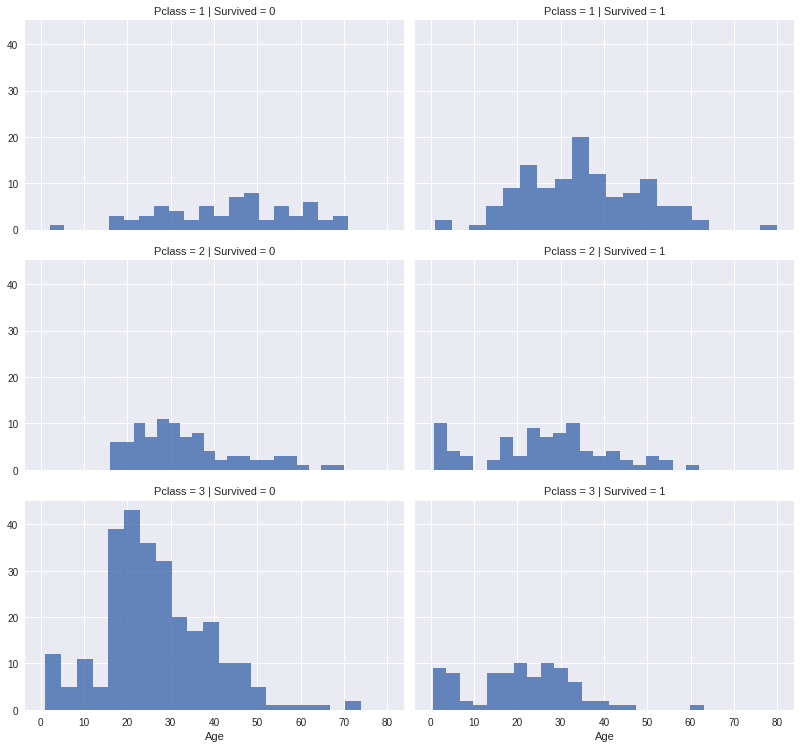

In [9]:
"""
-> How representative is the training dataset of the actual problem domain.
Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
"""
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=3.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.85, bins=20)
grid.add_legend();

# g = sns.FacetGrid(train_df, col='Survived')
# g.map(plt.hist, 'Age', bins=20,) # tweak the facet grid onto a histogram

"""
In particular, FacetGrid is used to draw plots with multiple Axes where each Axes shows the same relationship
conditioned on different levels of some variable. It’s possible to condition on up to three 
variables by assigning variables to the rows and columns of the grid and using different colors for the plot elements.
"""
#Here we see a shift in Age bulk when going from Survived =0 to =1

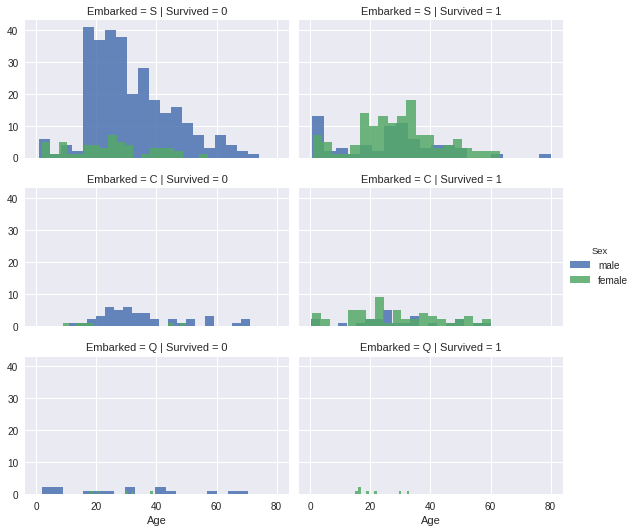

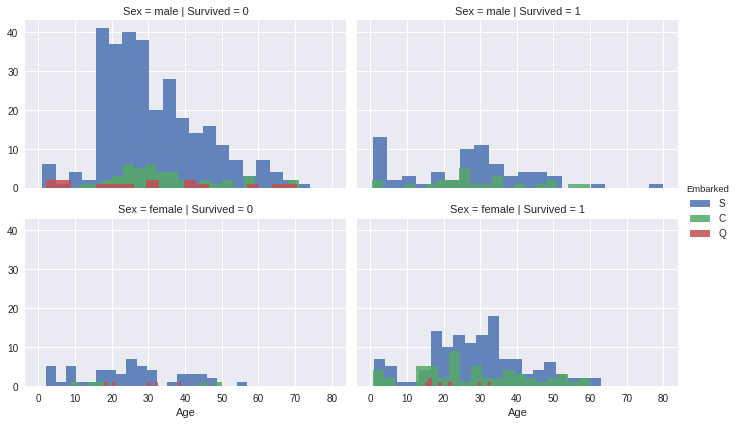

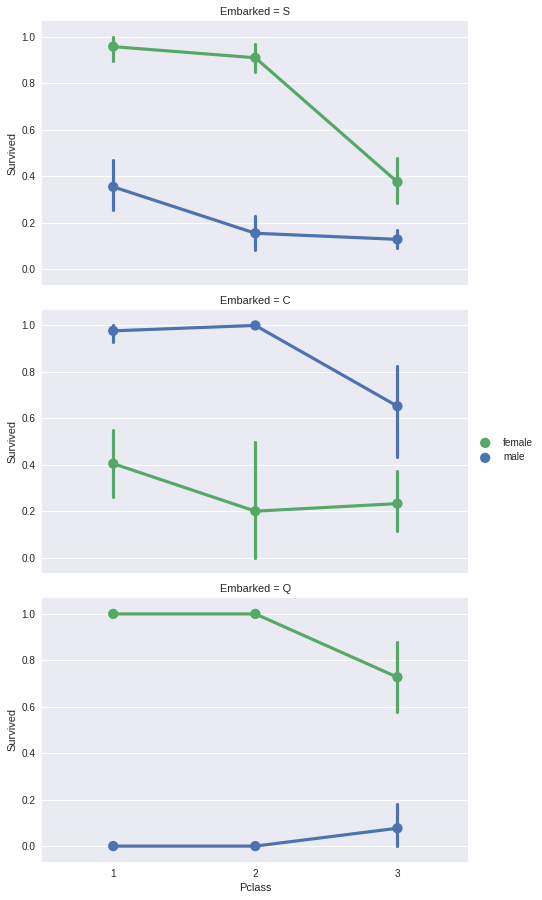

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked',hue='Sex', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.85, bins=20)
grid.add_legend();

grid = sns.FacetGrid(train_df, col='Survived', row='Sex',hue='Embarked', size=3.0, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.85, bins=20)
grid.add_legend();

# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=4.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [11]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
figsize=(20,10)

"""Wrangle data - Means we change/drop features,scale values, replace NaNs etc.
"""
print "Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1) #by default it drops a row(givenindex no), not column
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [12]:
"""Cool function - dataset.Name.str.extract """
for dataset in combine: #two datasets.
    dataset['Title'] = dataset.Name.str.extract(' (\w+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])
#Now its modified once.
#on that we'd group a few titles into 'Rare' type.
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',ascending=False)
#mean survival rate

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [13]:
#Converting - 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]

#Further converting
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} )#.fillna(3).astype(int)
    dataset['Embarked'] = dataset['Embarked']

train_df.sample(10)
# dataset.loc[ (dataset.Age.isnull() != 1) & (dataset.Sex == 1) & (dataset.Pclass == 2+1), 'Age']
# train_df[ (train_df['Sex'] != 1) | (train_df['Sex'] != 0) ] #round brackets matter !

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
746,0,3,0,16.0,1,1,20.250,S,1
262,0,1,0,52.0,1,1,79.650,S,1
26,0,3,0,NaN,0,0,7.225,C,1
505,0,1,0,18.0,1,0,108.900,C,1
885,0,3,1,39.0,0,5,29.125,Q,3
750,1,2,1,4.0,1,1,23.000,S,2
554,1,3,1,22.0,0,0,7.775,S,2
558,1,1,1,39.0,1,1,79.650,S,3
492,0,1,0,55.0,0,0,30.500,S,1
250,0,3,0,NaN,0,0,7.250,S,1


[array([ 1.98695633, -1.29938117,  0.76809875]),
 array([-0.41307438,  0.4377532 , -0.39493049,  0.64656571])]

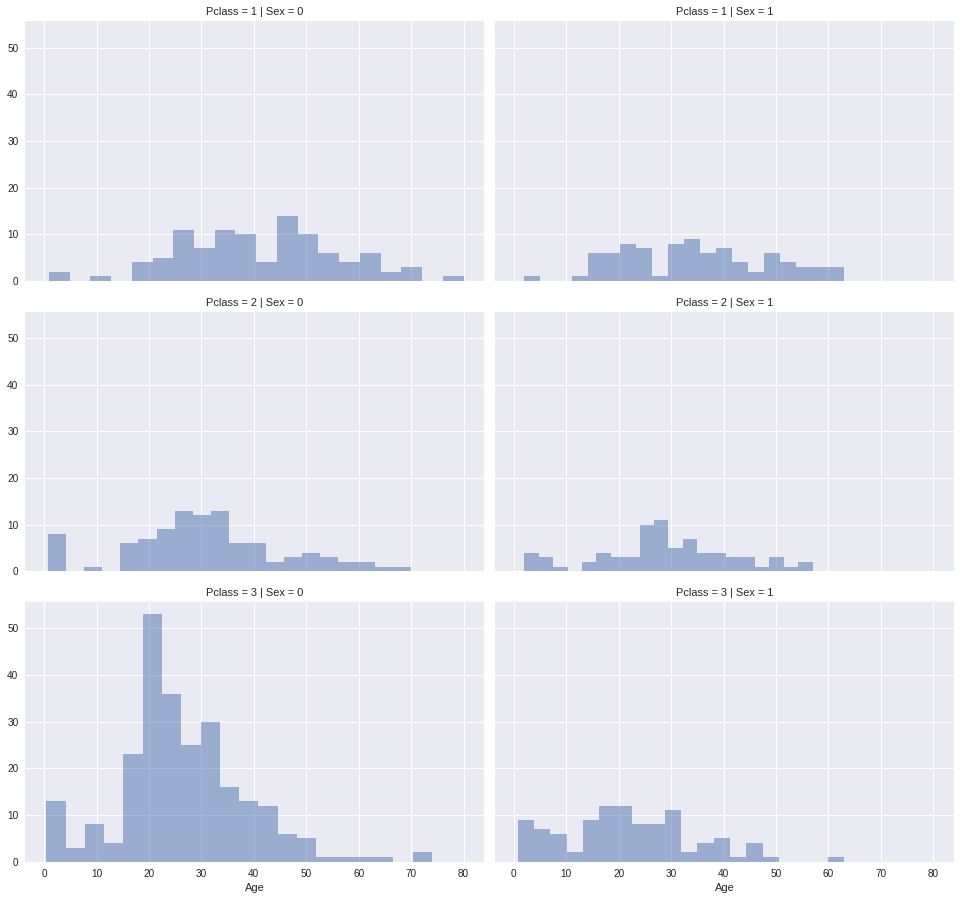

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [15]:
"""
Numerical-Cts 
Completing missing values = 
M1 - fill by random numbers between mean and std deviation
M2 - make use of above graph i.e. the dependance of Age on the variables Pclass and Sex - calc median age for each of
the combinations
"""
guess_ages = np.zeros((2,3))
nulls = train_df.Age.isnull()
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)


train_df.loc[nulls]# + train_df.loc[ (train_df.Sex == 1) & (train_df.Pclass == 3)]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,0,3,0,25,0,0,8.4583,Q,1
17,1,2,0,30,0,0,13.0000,S,1
19,1,3,1,21,0,0,7.2250,C,3
26,0,3,0,25,0,0,7.2250,C,1
28,1,3,1,21,0,0,7.8792,Q,2
29,0,3,0,25,0,0,7.8958,S,1
31,1,1,1,35,1,0,146.5208,C,3
32,1,3,1,21,0,0,7.7500,Q,2
36,1,3,0,25,0,0,7.2292,C,1
42,0,3,0,25,0,0,7.8958,C,1


In [16]:
def getCatDict(catList):
    cats  = pd.Series(catList, dtype="category")
    ageMap = { j:i for i,j in enumerate(cats)}
    return ageMap;

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
catList = ['(-0.08, 16]','(16, 32]','(32, 48]','(48, 64]','(64, 80]'];
ageMap = getCatDict(catList);#{ j:i for i,j in enumerate(cats)}

# train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
train_df['Age'] = train_df['AgeBand'].map(ageMap);

train_df = train_df.drop(['AgeBand'], axis=1);
combine = [train_df, test_df];
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [17]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [18]:
"""Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance."""
freq_port = train_df.Embarked.dropna().mode()[0]
# Mode is the most frequent value !!
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Median is usually chosen for numerical features, Mode is for Categorical, THINK !
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,34,7.8292,2,1,1,102
1,893,3,1,47,7.0000,0,3,0,141
2,894,2,0,62,9.6875,2,1,1,124
3,895,3,0,27,8.6625,0,1,1,81
4,896,3,1,22,12.2875,0,3,0,66


In [19]:
# .dropna() returns NonNA values
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) #four parts by percentile & not percentage.
"""
So, when you ask for quintiles with qcut, the bins will be chosen so that you have 
the same number of records in each bin. You have 30 records, so should have 6 in each bin 
"""
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


# qcut Makes it categorical while cut keeps it numerical
# train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) #four parts by percentile & not percentage.
# OR
# train_df['FareBand'] = pd.cut(train_df['Fare'], 4) #four parts by percentage.
# catList = ['(-0.08, 16]','(16, 32]','(32, 48]','(48, 64]','(64, 80]'];

cats = getCatDict(['(0,7.91]','(7.91,14.454]','(31,512.329]','(14.454,31]']);
# train_df['FareBand'].map(cats)
train_df.FareBand.value_counts() #Get category values

(7.91, 14.454]    224
[0, 7.91]         223
(31, 512.329]     222
(14.454, 31]      222
Name: FareBand, dtype: int64

In [20]:
#Just coz the map wasn't working
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [21]:
"""
 We want to identify relationship between output (Survived or not) with other variables
 or features (Gender, Age, Port...). We are also perfoming a category of machine learning 
 which is called supervised learning as we are training our model with a given dataset. 
 With these two criteria - Supervised Learning plus Classification and Regression, we can 
 narrow down our choice of models to a few. These include:
 
Logistic Regression

KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine
"""
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

test_df.head(10) #wil not contain survive column coz we are predicting just that

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,34,0,2,1,1,102
1,893,3,1,47,0,0,3,0,141
2,894,2,0,62,1,2,1,1,124
3,895,3,0,27,1,0,1,1,81
4,896,3,1,22,1,0,3,0,66
5,897,3,0,14,1,0,1,1,42
6,898,3,1,30,0,2,2,1,90
7,899,2,0,26,2,0,1,0,52
8,900,3,1,18,0,1,3,1,54
9,901,3,0,21,2,0,1,0,63


In [22]:
X_train = train_df.drop(['Survived'],axis=1);
X_test = test_df.drop(['PassengerId'],axis=1);
Y_train = train_df['Survived'];

In [23]:
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False);
logreg.fit(X_train,Y_train);
# dual True = 81.257 (takes more iter) ; False =81.257 
# penalty l1 = 81.145 ; l2 =81.257
# tol 1 = 79.125 ; 0.0001 =81.257

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 3)

acc_log

[LibLinear]

81.257

In [24]:
"""
#  calculating the coefficient of the features in the decision function.


# Higher survival on increasing a feature => Positive coefficient
# and versa for Negative coefficient
Correlations With Survived => Skewest survival probability difference among the categories.
      Sex  Survived
0  female  0.742038
1    male  0.188908

Other correlations were - 
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

"""

'\n#  calculating the coefficient of the features in the decision function.\n\n\n# Higher survival on increasing a feature => Positive coefficient\n# and versa for Negative coefficient\nCorrelations With Survived => Skewest survival probability difference among the categories.\n      Sex  Survived\n0  female  0.742038\n1    male  0.188908\n\nOther correlations were - \n   Pclass  Survived\n0       1  0.629630\n1       2  0.472826\n2       3  0.242363\n\n  Embarked  Survived\n0        C  0.553571\n1        Q  0.389610\n2        S  0.336957\n\n   SibSp  Survived\n1      1  0.535885\n2      2  0.464286\n0      0  0.345395\n3      3  0.250000\n4      4  0.166667\n5      5  0.000000\n6      8  0.000000\n\n   Parch  Survived\n3      3  0.600000\n1      1  0.550847\n2      2  0.500000\n0      0  0.343658\n5      5  0.200000\n4      4  0.000000\n6      6  0.000000\n\n'

In [25]:
train_df.groupby('Age*Class').mean()#.sorted_values(by='Survived',ascending=False)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
Age*Class,,,,,,,,
0,0.550000,2.610000,0.490000,0.000000,2.050000,0.330000,2.590000,0.160000
1,0.728814,1.000000,0.542373,1.000000,2.847458,0.508475,1.728814,0.457627
2,0.520408,1.494898,0.397959,1.505102,2.015306,0.270408,1.821429,0.602041
3,0.277487,2.774869,0.290576,1.225131,0.989529,0.479058,1.479058,0.717277
4,0.415094,1.886792,0.396226,2.226415,1.735849,0.075472,1.849057,0.584906
6,0.149425,2.804598,0.252874,2.195402,1.114943,0.172414,1.643678,0.655172
8,0.000000,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000
9,0.111111,3.000000,0.111111,3.000000,0.444444,0.000000,1.222222,1.000000
12,0.000000,3.000000,0.000000,4.000000,0.000000,1.333333,1.000000,1.000000


In [26]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


In [45]:
# Support Vector Machines

svc = SVC(verbose=1)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

[LibSVM]

83.5

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

In [47]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian
gaussian

GaussianNB(priors=None)

In [50]:
# Perceptron

perceptron = Perceptron(verbose=1)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron
perceptron

-- Epoch 1
Norm: 23.96, NNZs: 7, Bias: 4.000000, T: 891, Avg. loss: 4.175084
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.44, NNZs: 8, Bias: 6.000000, T: 1782, Avg. loss: 4.094837
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 22.25, NNZs: 7, Bias: 8.000000, T: 2673, Avg. loss: 4.031051
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 23.00, NNZs: 8, Bias: 11.000000, T: 3564, Avg. loss: 4.019360
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 28.72, NNZs: 8, Bias: 12.000000, T: 4455, Avg. loss: 4.035466
Total training time: 0.00 seconds.


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=2, warm_start=False)

In [51]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


79.46

In [52]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.99

In [53]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#highest till now
acc_decision_tree

86.64

In [54]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.640
8,Decision Tree,86.640
1,KNN,84.060
0,Support Vector Machines,83.500
2,Logistic Regression,81.257
7,Linear SVC,79.460
5,Perceptron,78.790
6,Stochastic Gradient Decent,76.990
4,Naive Bayes,76.880


In [56]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)